In [1]:
import numpy as np
from tensorflow import keras
import tensorflow as tf
from keras.models import load_model,Sequential
from keras.utils import to_categorical,plot_model
from keras.layers import Dense,Flatten,Conv2D,Dropout,MaxPooling2D
import matplotlib.pyplot as plt

In [2]:
from keras.datasets import mnist

In [3]:
(x_train,y_train),(x_test,y_test) = mnist.load_data()

In [4]:
x_train.shape

(60000, 28, 28)

In [5]:
x_train = x_train.reshape((60000,28,28,1)).astype('float32')

In [6]:
x_test = x_test.reshape((x_test.shape[0],28,28,1)).astype('float32')

In [7]:
x_train = x_train / 255
x_test = x_test / 255

In [8]:
y_train = to_categorical(y_train,num_classes=10)
y_test = to_categorical(y_test,num_classes=10)

In [9]:
model = Sequential()

In [10]:
model.add(Conv2D(32,(3,3),activation='relu',input_shape=(28,28,1)))

In [11]:
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10,activation='softmax'))

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 12, 12, 64)        0         
                                                                 
 flatten (Flatten)           (None, 9216)              0         
                                                                 
 dense (Dense)               (None, 128)               1179776   
                                                        

In [13]:
model.compile(loss='categorical_crossentropy',optimizer='sgd',metrics=['accuracy'])

In [14]:
history = model.fit(x_train,y_train,batch_size=64,epochs=2,validation_data=(x_test,y_test))

Epoch 1/2
938/938 [==============================] - 72s 76ms/step - loss: 0.7705 - accuracy: 0.7551 - val_loss: 0.2623 - val_accuracy: 0.9182
Epoch 2/2
938/938 [==============================] - 72s 77ms/step - loss: 0.3631 - accuracy: 0.8888 - val_loss: 0.1981 - val_accuracy: 0.9404


In [15]:
loss,accuracy = model.evaluate(x_test,y_test)

313/313 [==============================] - 3s 9ms/step - loss: 0.1981 - accuracy: 0.9404


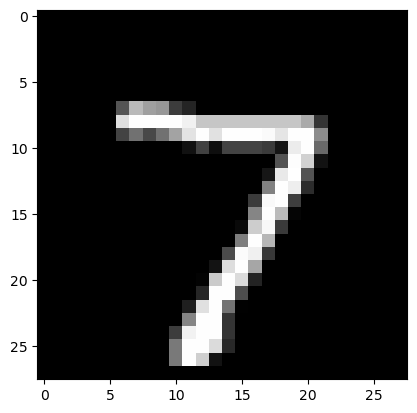

In [16]:
plt.imshow(x_test[0],cmap='gray')

In [19]:
pred_img = model.predict(x_test[0].reshape(1,28,28,1))

1/1 [==============================] - 0s 63ms/step


In [20]:
pred_img.argmax()

7